In [2]:
import pandas as pd
file_path = '/kaggle/input/mushroomsuci/agaricus-lepiota.data'
columns = [
    'class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
    'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
    'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
    'stalk_surface_below_ring', 'stalk_color_above_ring',
    'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
    'ring_type', 'spore_print_color', 'population', 'habitat'
]
df = pd.read_csv(file_path, header=None, names=columns)

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])  
print("Target mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Target mapping: {'e': 0, 'p': 1}


In [4]:
categorical_cols = df.columns[df.dtypes == 'object']
print("Categorical features to encode:", list(categorical_cols))

for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

Categorical features to encode: ['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']


In [8]:
y = df['class']
X = df[['odor', 'spore_print_color', 'gill_color', 'stalk_root']]#random features i've selected
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logr = LogisticRegression(max_iter=200)
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8535384615384616

Confusion Matrix:
 [[721 122]
 [116 666]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       843
           1       0.85      0.85      0.85       782

    accuracy                           0.85      1625
   macro avg       0.85      0.85      0.85      1625
weighted avg       0.85      0.85      0.85      1625



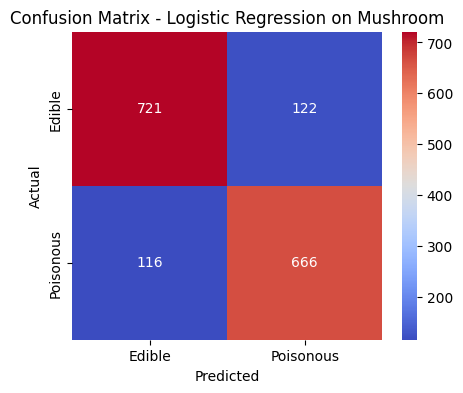

In [9]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="coolwarm", xticklabels=['Edible','Poisonous'], yticklabels=['Edible','Poisonous'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression on Mushroom")
plt.show()

In [10]:
sample = X_test.iloc[0].values.reshape(1, -1)
probability = logr.predict_proba(sample)
print("\nFor sample mushroom:", sample)
print("Probability edible vs poisonous:", probability)


For sample mushroom: [[5 3 3 3]]
Probability edible vs poisonous: [[0.78077493 0.21922507]]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [11]:
#today's class- gradient descent
X_train = np.c_[np.ones(X_train.shape[0]), X_train] 
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(y, y_hat):
    m = len(y)
    return -(1/m) * np.sum(y*np.log(y_hat + 1e-9) + (1-y)*np.log(1-y_hat + 1e-9))

def gradient_descent(X, y, lr=0.1, epochs=1000, lam=0):
    m, n = X.shape
    theta = np.zeros((n,1))
    cost_history = []
    for _ in range(epochs):
        z = X.dot(theta)
        y_hat = sigmoid(z)
        cost = compute_cost(y, y_hat) + (lam/(2*m))*np.sum(theta[1:]**2)
        cost_history.append(cost)
        grad = (1/m) * X.T.dot(y_hat - y) + (lam/m) * np.r_[[[0]], theta[1:]]
        theta -= lr * grad
    return theta, cost_history

theta, cost_hist = gradient_descent(X_train, y_train, lr=0.1, epochs=500, lam=1)
y_pred = sigmoid(X_test.dot(theta)) >= 0.5
acc = np.mean(y_pred == y_test)
print("Manual Logistic Regression (GD + L2) Accuracy:", acc)

Manual Logistic Regression (GD + L2) Accuracy: 0.812923076923077


In [12]:
#reg
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logr = LogisticRegression(penalty=None, max_iter=200)
logr.fit(X_train, y_train)
print("Sklearn (No regularization) Acc:", accuracy_score(y_test, logr.predict(X_test)))
logr_l2 = LogisticRegression(penalty='l2', max_iter=200, solver='lbfgs')
logr_l2.fit(X_train, y_train)
print("Sklearn (L2) Acc:", accuracy_score(y_test, logr_l2.predict(X_test)))
logr_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=200)
logr_l1.fit(X_train, y_train)
print("Sklearn (L1) Acc:", accuracy_score(y_test, logr_l1.predict(X_test)))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Sklearn (No regularization) Acc: 0.8535384615384616
Sklearn (L2) Acc: 0.8535384615384616
Sklearn (L1) Acc: 0.8535384615384616


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
